# Starbucks Capstone Challenge

## Project Overview

In my final project, I aim to answer the following questions:

1. What are the main motivators that make an offer convert into a sale?
2. Is it possible to predict the acceptance of an offer by a customer with the data sets made available?

The data sets used for the development of this project contain simulated data that mimic customer behavior in the Starbucks mobile rewards app. Every few days, Starbucks sends an offer to users of the mobile app. An offer can be just an ad for a drink or a real offer, like a discount or BOGO (buy one and take another). Some users may not receive an offer for certain weeks. Not all users receive the same offer, and that is the challenge to be solved with this data set.

As part of the solution and for a better organization of the analysis layout, I will conduct the project using the CRISP-DM methodology.

## 1. Business Understanding

Background: The Starbucks company generates offers and sends them to its customers through the mobile application. Through these offers, they aim to increase the company's revenue by converting these offers into effective sales. as mentioned above in the project overview, the data sets used for the development of this project contain data that simulate the customer's behavior in the mobile application and have the following information:

- Offer portfolio, which consists of the attributes of each offer
- Demographic data for each customer
- Transactional records of events that occur in the application

Project objective: The objective of this project is to answer the following questions below

1. What are the main motivators that make an offer convert into a sale?
2. Is it possible to predict the acceptance of an offer by a customer with a set of data available?

Using the data sets available for this project, I develop analyzes to answer the above questions using machine learning models. The use of machine learning models help me to identify the main motivators for generating a good offer, as well as to generate predictions about the acceptance of offers by customers in the mobile application. Throughout the process, I explore characteristics of customers who accept or reject the offers generated and I also explore how much money a customer could spend on an offer that is influencing them.

Success Criterion: The success criterion for this project will be to be able to answer the questions defined in the objective based on the analyzes that will be generated.

### Import Libraries

In [16]:
import pandas as pd
import numpy as np
import json
import math

import pandas_profiling

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

from time import time

import matplotlib.pyplot as plt
%matplotlib inline

### Load Data Sets

In [17]:
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

## 2. Data Understanding

## Exploraroty Data Analisys

**Data Sets - Details**

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Below I share an analysis of each data set:


### Details: portfolio.json - Containing offer ids and meta data about each offer (duration, type, etc.)
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

As identified, there are three different types of offers, they are:

* BOGO - buy one and get one free
* Discount - Discount on purchase
* Informational - provides product information

The application of each type of offer was not explained in the context of the data set, however I will be assuming that the application of each type of offer is according to the number of days




In [20]:
# Generating report for exploratory data analysis using pandas profiling library
portfolio.profile_report()

profile_portfolio = portfolio.profile_report(title='EDA - Pandas Profiling - Portfolio')
profile_portfolio.to_file(output_file=r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Udacity\Data Scientist Nano Degree\Capstone Project\StartBucks Project\EDA - Pandas Profiling - Portfolio.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 99.98it/s]


In [18]:
# Introducing the first 10 rows of the data set
portfolio.head(10)

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


It is possible to verify that some scales used in the data are different, for example, the duration column is in days while the difficulty column is in dollars which indicates that I will have to dimension some resources. In addition, the channels column as a list will need to be worked on to make it a categorical variable.

In [22]:
# Verifyng the number of unique offers
portfolio.id.nunique()

10

In [23]:
portfolio.groupby('offer_type')['id'].count()

offer_type
bogo             4
discount         4
informational    2
Name: id, dtype: int64

As discovered, 10 different ids of offers were found, being 2 informative types, 4 of the BOGO type and 4 of the discount type.

In [21]:
# Veifying null values
portfolio.isnull().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

As verified, there are no null values in the data set. There is no need to adopt any strategy at this point

### Details: profile.json - Demographic data for each customer
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [25]:
# Generating report for exploratory data analysis using pandas profiling library
profile.profile_report()

profile_profile = portfolio.profile_report(title='EDA - Pandas Profiling - Profile')
profile_profile.to_file(output_file=r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Udacity\Data Scientist Nano Degree\Capstone Project\StartBucks Project\EDA - Pandas Profiling - Profile.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 90.88it/s]


In [27]:
# Introducing the first 10 rows of the data set
profile.head(10)

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
5,M,68,e2127556f4f64592b11af22de27a7932,20180426,70000.0
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
8,M,65,389bc3fa690240e798340f5a15918d5c,20180209,53000.0
9,None,118,8974fc5686fe429db53ddde067b88302,20161122,NaN


According to information extracted from the code above by viewing the first ten lines, null values can be verified in the gender and income columns. In addition, in the age column an age of 118 can be verified which can be an oulier in my data set.

In [28]:
# Verifyng null values
profile.isnull().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

Through the above verification, the same amount of null values can be seen between the income and gender columns.

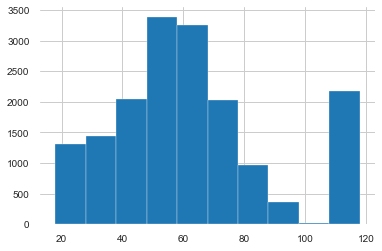

In [29]:
# Verifying the distribution of values within the age column. With this verification it will be possible to draw some conclusions about possible outliers as previously seen at the age of 118 years.
profile.age.hist()

### Details: transcript.json - Records for transactions, offers received, offers viewed, and offers completed
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

In [26]:
# Generating report for exploratory data analysis using pandas profiling library
transcript.profile_report()

profile_transcript = portfolio.profile_report(title='EDA - Pandas Profiling - Transcript')
profile_transcript.to_file(output_file=r'C:\Users\hik_m\Documents\Jornada do Conhecimento\Udacity\Data Scientist Nano Degree\Capstone Project\StartBucks Project\EDA - Pandas Profiling - Transcript.html')

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 111.08it/s]
